In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import signal
import os
import glob
from sklearn import preprocessing
from pysptools import spectro as sp
from IPython.display import display
import ipywidgets as widgets
from math import*
import peakutils
import rampy as rp

In [2]:
path = "../data/enviData/ENVIFilesUsgsOriginal/"
txt_files = glob.glob(path + "/**/*.txt", recursive = True)

In [3]:
len(txt_files)

481

In [26]:
for index in range(len(txt_files)):
    temp = pd.read_csv(txt_files[index], skiprows = 3, header = None, sep='  ')
    x_old = list(map(float, temp[0]*1000))
    #normalized_spectraValue = preprocessing.normalize([temp[1]])[0]
    x_new = np.arange(350., 2501., 1.)
    y_new = rp.resample(x_old, temp[1], x_new, fill_value="extrapolate")
    spect = pd.DataFrame(x_new)
    spect[1] = y_new
    spect.columns = ['wave','reflectance']
    targetPath = txt_files[index].replace('ENVIFilesUsgsOriginal', 'ENVIFilesUsgsProcessed2')
    spect.to_csv(targetPath, index=None, sep=' ')

/Users/ankit/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


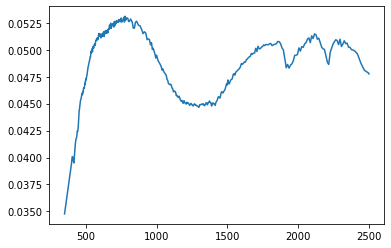

In [22]:
plt.plot(x_new, y_new)